In [1]:
#import packages
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('./Dataset/earthquakes.csv')
df = df.drop(columns='Year')
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

<AxesSubplot:xlabel='date'>

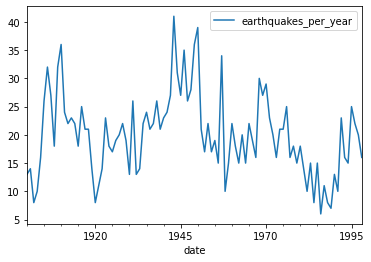

In [3]:
import matplotlib.pyplot as plt
df.plot()

In [4]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(df)

#print ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('number of lags:', result[2])
print('number of observations:', result[3])

ADF Statistic: -3.183192251191782
p-value: 0.02097842525600371
number of lags: 2
number of observations: 96


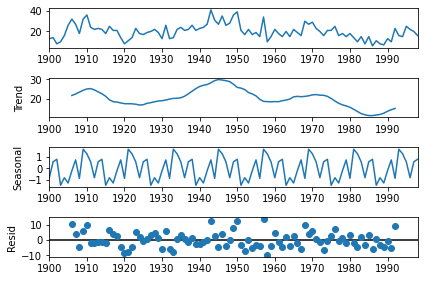

In [69]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df, 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
#using train_test_split

train, test = train_test_split(df, test_size = 0.1, shuffle = False)

In [57]:
train

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0
...,...
1984-01-01,8.0
1985-01-01,15.0
1986-01-01,6.0


In [6]:
test

,earthquakes_per_year
date,
1989-01-01,7.0
1990-01-01,13.0
1991-01-01,10.0
1992-01-01,23.0
1993-01-01,16.0
1994-01-01,15.0
1995-01-01,25.0
1996-01-01,22.0
1997-01-01,20.0


In [71]:
#automation using pmdarima
import pmdarima as pm
# Create model for SARIMAX(p,1,q)
model2 = pm.auto_arima(df,
                      seasonal=False,
                      d=0, 
                      start_p=0, start_q=0,
                      max_p=5, max_q=5,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=888.430, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=666.646, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=799.674, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=656.028, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=649.748, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=650.228, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=650.010, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=648.843, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=647.132, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=648.739, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=761.067, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=648.851, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=640.456, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=654.847, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=643.9

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df, order=(1,0,1))
model_fit = model.fit()
model_pred = model_fit.predict(start='1989-01-01',end='1998-01-01')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


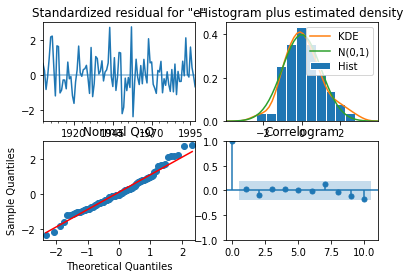

In [73]:
model_fit.plot_diagnostics()
plt.show()

In [74]:
model_pred

1989-01-01     9.083084
1990-01-01     8.074278
1991-01-01    10.143248
1992-01-01     9.971938
1993-01-01    15.566076
1994-01-01    15.589256
1995-01-01    15.164455
1996-01-01    19.305977
1997-01-01    20.278098
1998-01-01    19.939243
Freq: AS-JAN, Name: predicted_mean, dtype: float64

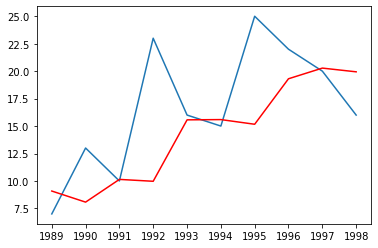

In [75]:
plt.plot(test)
plt.plot(model_pred,color='red')
plt.show()

In [70]:
mae = np.mean(np.abs(model_fit.resid))
mae

4.755625670670786

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(df, order=(1,0,1))
model_fit1 = model1.fit()
model_pred1 = model_fit1.predict(start='1989-01-01',end='2020-01-01')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [96]:
one_step_forecast = model_fit1.get_prediction(start=100,end=120)

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower earthquakes_per_year']
upper_limits = confidence_intervals.loc[:,'upper earthquakes_per_year']

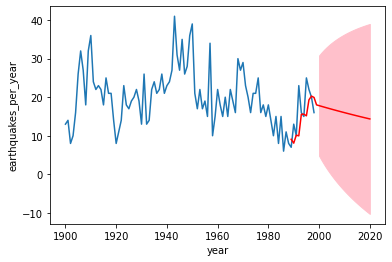

In [98]:
plt.plot(df)
plt.plot(model_pred1,color='red')
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')
plt.ylabel('earthquakes_per_year')
plt.xlabel('year')
plt.show()